# Generate Dataset from Dota2 API

## Get Sumail's latest 500 Dota2 game

In [1]:
import time
import urllib2
import json

# limit: 500
# game_mode: 1.All pick  3.Random Draft (most popular game mode) 22. ranked all pick
# version: 7.07 (latest game version)
player_dat = urllib2.urlopen("https://api.opendota.com/api/players/111620041/matches?limit=500#game_mode=1,3#patch=7.07").read()
print player_dat

[{"match_id":3616367547,"player_slot":4,"radiant_win":true,"duration":1776,"game_mode":22,"lobby_type":7,"hero_id":75,"start_time":1513190997,"version":null,"kills":11,"deaths":5,"assists":16,"skill":null,"leaver_status":0,"party_size":null},{"match_id":3616309178,"player_slot":1,"radiant_win":true,"duration":2063,"game_mode":22,"lobby_type":7,"hero_id":51,"start_time":1513188192,"version":null,"kills":14,"deaths":6,"assists":13,"skill":null,"leaver_status":0,"party_size":null},{"match_id":3615120175,"player_slot":132,"radiant_win":true,"duration":1851,"game_mode":22,"lobby_type":7,"hero_id":51,"start_time":1513136270,"version":null,"kills":2,"deaths":12,"assists":6,"skill":null,"leaver_status":0,"party_size":null},{"match_id":3614928641,"player_slot":1,"radiant_win":true,"duration":2264,"game_mode":22,"lobby_type":7,"hero_id":10,"start_time":1513122263,"version":21,"kills":6,"deaths":9,"assists":9,"skill":null,"leaver_status":0,"party_size":1},{"match_id":3614737982,"player_slot":0,"r

## Extract Sumail's 500 match id

In [3]:
player_dat_json = json.loads(player_dat)
sumail_match_id = []
f_sumail = open('sumail_match_id.txt','w')
for i in player_dat_json:
    sumail_match_id.append(i["match_id"])
    f_sumail.write(str(i["match_id"]) + '\n')
f_sumail.close()

## Get Sumail's 500 matchs information

In [4]:
sumail_dat = []
ff_sumail = open('sumail_match.txt', 'w')
for i in range(0,100):
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(sumail_match_id[i])).read()
    time.sleep(0.5)
    sumail_dat.append(match_dat)
    ff_sumail.write(match_dat + '\n')
    print i 
ff_sumail.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
# test
d = sumail_dat[0]
d_json = json.loads(d)
players = d_json['players']
for x in players:
    if x['account_id'] == 111620041:
        print x
        

{u'gold': 1018, u'firstblood_claimed': None, u'damage_inflictor_received': None, u'lh_t': None, u'repicked': None, u'damage_taken': None, u'kill_streaks': None, u'cosmetics': [], u'hero_id': 107, u'kills_log': None, u'account_id': 111620041, u'kills': 4, u'kills_per_min': 0.12164216928535226, u'start_time': 1510786739, u'isRadiant': True, u'backpack_1': 266, u'backpack_0': 214, u'leaver_status': 0, u'actions': None, u'killed': None, u'stuns': None, u'gold_per_min': 272, u'name': u'SumaiL', u'level': 16, u'damage_inflictor': None, u'patch': 26, u'item_4': 0, u'item_5': 244, u'item_2': 1, u'item_3': 92, u'item_0': 181, u'item_1': 36, u'sen_left_log': None, u'obs_placed': None, u'match_id': 3564103153L, u'kda': 1, u'pings': None, u'gold_reasons': None, u'total_gold': 8944, u'item_uses': None, u'duration': 1973, u'sen': None, u'lobby_type': 7, u'denies': 0, u'rune_pickups': None, u'killed_by': None, u'permanent_buffs': None, u'last_login': None, u'gold_t': None, u'xp_per_min': 361, u'abili

## Extracte certain variable

In [91]:
# get one match's information
def get_match(id):
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(id)).read()
    return match_dat 

# get one 
def player_avg_1(matches, field):
    field_avg = 0.0
    num = len(matches)
    for i in matches:
        i_json = json.loads(i)
        field_avg += i_json[field]/float(num)
    return field_avg

def get_player_stats_in_match(match, player_id):
    players = match['players']
    for x in players:
        if x['account_id'] == player_id:
            return x

def player_avg_player(matches, player_id, field):
    field_avg = 0.0
    num = len(matches)
    for x in matches:
        x_json = json.loads(x)
        player_data = get_player_stats_in_match(x_json, player_id)
        y = player_data[field]
        if y == None:
            y = 0
        field_avg += y / float(num)
    return field_avg

def dat_dist_1(matches, field):
    match_fields = []
    f = open('match_' + field + '.csv', 'w')
    for match in matches:
        match_json = json.loads(match)
        for i in match_json:
            f.write(str(i[field]) + '\n')
            match_fields.append(i[field])
    f.close()
    return match_fields

def get_random_mataches(count, matches):
    res = []
    cur = 0
    f = open('randoms_matches.txt', 'a')
    for match in matches:
        match_json = json.loads(match)
        for x in match_json:
            m_detail = get_match(x['match_id'])
            f.write(str(m_detail) + '\n')
            time.sleep(0.4)
            cur += 1
            if cur == count:
                f.close()
                return res
    f.close()
    return res


def dat_player_dist_1(matches, field):
    res = []
    f = open('dat_player_' + field + '.csv', 'w')

    for match in matches:
        try:
            detail_json = json.loads(match)  
        except ValueError, e:
            continue
        players = detail_json['players']

        for y in players:
            p_data = y[field]
            #print p_data
            if p_data == None:
                p_data = 0
            res.append(p_data)
            f.write(str(p_data) + '\n')
    f.close()
    return res
  
def read_file(name):
    f = open(name, 'r')
    res = []
    for line in f:
        res.append(line)
    return res

## Get random matches and extract their matches id

In [193]:
def request_random_matches(matches_num):
    id = "?less_than_match_id=3596413300"
    for n in range(matches_num):
        random_matches = urllib2.urlopen("https://api.opendota.com/api/publicMatches" + str(id)).read()
        # the game modes are also random
        random_matches = json.loads(random_matches)
        f_write_random = open('random_match_id.txt', 'a')
        for match in random_matches:
            f_write_random.write(str(match['match_id']) + '\n')
        f_write_random.close()
        id = "?less_than_match_id=" + str(match['match_id'])
    # each random request can request 100 random matches information   
    # Out put: 'random_match_id.txt' (record 10000 matches id in string type)


num_random_request = 100
request_random_matches(num_random_request)

## Get each random match's players information

In [118]:
def read_matches_id(file_name):     
    f_read_random = open(file_name, 'r+')
    random_matches_id = f_read_random.readlines()
    f_read_random.close()
    for i in range(len(random_matches_id)):
        random_matches_id[i] = random_matches_id[i].strip('\n')
    return random_matches_id
    # Out put: list of all random matches id
    
def get_match_data(id):
    # get one match's information
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(id)).read()
    match_dat = json.loads(match_dat)
    return match_dat
    # Out put: match data of certain match id

def save_players_data(file_name):
    random_matches_id = read_matches_id(file_name)
    f_write_match = open('players_info.csv', 'a')
    id_temp = 3599015402 + 1
    for id in random_matches_id:        
        if int(id) < id_temp:
            print id
            id_temp = id
            match_dat = get_match_data(id)
            time.sleep(0.35)
            # matching useful matches 
            if (len(match_dat) == 41):
                # matching needed game mode
                print match_dat["game_mode"]
                if (match_dat["game_mode"] == 1 or match_dat["game_mode"] == 3 or match_dat["game_mode"] == 22):
                    print "get one"
                    for i in range(10):
                        # personal information 5
                        f_write_match.write(str(match_dat['players'][i]['account_id']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['hero_id']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['lose']) + ',')
                        f_write_match.write(str(int(match_dat['players'][i]['isRadiant'])) + ',')
                        f_write_match.write(str(match_dat['players'][i]['duration']) + ',')
                        # farm 4
                        f_write_match.write(str(match_dat['players'][i]['gold_per_min']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['xp_per_min']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['hero_damage']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['tower_damage']) + ',')
                        # skill 7
                        f_write_match.write(str(match_dat['players'][i]['kills']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['deaths']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['assists']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['last_hits']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['denies']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['rune_pickups']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['courier_kills']) + ',')
                        # support 5
                        f_write_match.write(str(match_dat['players'][i]['stuns']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['sentry_uses']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['sentry_kills']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['hero_healing']) + ',')
                        f_write_match.write(str(match_dat['players'][i]['camps_stacked']) + '\n')                        
    f_write_match.close()
    # Out put: players information
# can not save as string

def read_players_data(file_name):
    f_read_player = open(file_name, 'r+')
    players_info = f_read_player.readlines()
    f_read_player.close()
    for i in range(len(players_info)):
        players_info[i] = players_info[i].strip('\n')
    return players_info


#save_players_data('random_match_id.txt')
#players_info = save_players_data('random_match_id.txt')
#players = dict(players_info[0])
#players
#3600053504
#'account_id','hero_id','lose','isRadiant','duration'
# farm:'gold_per_min','xp_per_min','hero_damage','tower_damage'
# skill: 'kills','deaths','assists','last_hits','denies','rune_pickups','courier_kills'
# support: 'stuns','sentry_uses','sentry_kills', 'hero_healing','camps_stacked'
#'damage_taken'

In [28]:
players_info = save_players_data('random_match_id.txt')
# 3600031007 3599970609 3599956805 3599879302 3599872805 3599864807 3599857306 3599791909 3599783202 3599749208 3599708701 3599676404
# 3599672902 3599650105 3599558506 3599523506 3599519008 3599419103 3599405404 3599362709 3599360502 3599352109 3599341902 3599342606
# 3599313500 3599289102 3599283100 3599270702 3599268000 3599238205 3599188804 3599122701 3599121504 3599118409 3599061605 3599015402
# 3598919404

3599015402
3599015401
3599015400
3599015204
3599015203
3599015202
3599015201
3599015008
22
get one
3599015004
3599014907
3599014905
3599014904
3599014900
22
get one
3599014804
3599014802
3599014709
3599014702
3599014701
3599014609
22
get one
3599014608
3599014509
3599014508
3599014502
3599014501
3599014403
3599014402
3599014306
3599014305
3599014207
22
get one
3599014206
3599014205
3599014204
3599014203
3599014201
3599014109
3599014107
3599014104
3599014101
3599014007
3599014006
3599014005
3599014004
3599013809
3599013708
3599013706
3599013704
3599013700
3599013606
3599013604
3599013505
3599013502
3599013406
3599013405
3599013403
3599013401
3599013400
3599013307
3599013305
3599013304
3599013303
3599013302
3599013300
3599013206
22
get one
3599013205
3599013204
22
get one
3599013200
3599013107
22
get one
3599013106
3599013105
3599013104
3599013103
3599013100
3599013007
3599013005
22
get one
3599013004
3599013000
22
get one
3599012909
3599012908
3599012801
3599012701
3599012602
3599012601

3598991409
3598991408
3598991406
3598991404
3598991402
3598991401
3598991306
22
get one
3598991305
3598991205
3598991204
22
get one
3598991203
3598991109
3598991108
3598991107
3598991106
3598991102
3598991009
3598991004
3598991003
3598991001
3598990909
3598990906
3598990905
3598990904
3598990903
3598990902
3598990703
3598990701
3598990607
3598990505
3598990504
3598990503
3598990408
3598990407
3598990406
3598990403
22
get one
3598990401
3598990309
22
get one
3598990306
3598990305
22
get one
3598990208
3598990206
22
get one
3598990203
3598990201
3598990200
3598990109
3598990108
3598990107
3598990106
3598990105
3598990103
3598990102
3598989903
3598989901
3598989900
3598989805
3598989802
3598989800
3598989709
3598989708
22
get one
3598989706
3598989702
22
get one
3598989701
3598989602
3598989601
3598989600
3598989509
3598989508
3598989504
3598989503
22
get one
3598989500
3598989408
3598989407
3598989406
3598989404
3598989403
3598989402
3598989304
3598989303
22
get one
3598989300
3598989202

3598968205
22
get one
3598968204
3598968203
3598968108
3598968107
3598968102
22
get one
3598968008
3
get one
3598968006
3598968005
3598968004
3598968003
3598968002
3598968000
3598967809
3598967808
3598967806
3598967706
3598967703
3598967701
3598967609
3598967605
3598967509
3598967508
3598967507
3598967506
3598967505
3598967407
3598967307
3598967305
3598967300
3598967209
3598967208
22
get one
3598967108
3598967107
3598967106
3598967105
3598967104
3598967103
3598967102
3598966909
3598966908
3598966907
3598966905
3598966902
3598966809
3598966807
3598966805
22
get one
3598966804
3598966803
3598966801
3598966504
3598966501
3598966409
3598966405
3598966400
3598966301
3598966300
3598966205
3598966203
3598966201
3598966105
3598966104
3598966101
3598965909
2
3598965908
3598965906
3598965905
3598965903
3598965901
3598965709
3598965706
3598965705
3598965704
22
get one
3598965701
3598965609
3598965608
22
get one
3598965607
22
get one
3598965500
3598965409
3598965407
3598965406
22
get one
359896540

3598944801
22
get one
3598944800
3598944709
22
get one
3598944703
3598944609
3598944608
3598944604
3598944603
22
get one
3598944503
3598944501
3598944500
3598944409
3598944408
22
get one
3598944407
3598944405
3598944404
3598944403
3598944402
3598944302
3598944207
22
get one
3598944204
3598944203
3598944201
3598944109
3598944107
3598944106
22
get one
3598944105
3598944104
22
get one
3598944001
3598943904
3598943902
3598943901
3598943900
3598943804
22
get one
3598943801
3598943607
3598943606
3598943605
3598943602
3598943601
3598943600
3598943409
3598943408
3598943406
3598943405
22
get one
3598943404
3598943400
3598943300
3598943207
3598943203
3598943202
3598943109
3598943009
3598943005
22
get one
3598943002
3598942801
3598942709
3598942707
3598942706
3598942704
3598942702
3598942607
3598942604
3598942603
3598942602
3598942508
3598942504
3598942500
3598942409
3598942407
3598942406
3598942404
3598942402
3598942400
3598942301
22
get one
3598942203
3598942200
22
get one
3598942109
3598942108

HTTPError: HTTP Error 521: Origin Down

In [ ]:
match_dat = get_match_data(3600040303)
match_dat["players"][0]['damage_taken']
f_write_match.close()

In [3]:
sumail_avg_duration = player_avg_1(sumail_dat, 'duration')
duration_dist = dat_dist_1(match_array, 'duration')
print sumail_avg_duration
print(duration_dist)

NameError: name 'player_avg_1' is not defined

## Request personal information

In [38]:
import time
import urllib2
import json
import numpy as np
import pandas as pd



def read_matches_id(file_name):     
    f_read_random = open(file_name, 'r+')
    random_matches_id = f_read_random.readlines()
    f_read_random.close()
    for i in range(len(random_matches_id)):
        random_matches_id[i] = random_matches_id[i].strip('\n')
    return random_matches_id

def get_match_data(id):
    # get one match's information
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(id)).read()
    match_dat = json.loads(match_dat)
    return match_dat
    # Out put: match data of certain match id


# limit: 500
# game_mode: 1.All pick  3.Random Draft (most popular game mode) 22. ranked all pick
# version: 7.07 (latest game version)
def request_personal_match_id(id, num):    
    player_dat = urllib2.urlopen("https://api.opendota.com/api/players/"+str(id)+"/matches?limit="+str(num)+"#game_mode=1,3,22").read()
    #print player_dat
    player_info = json.loads(player_dat)
    f_player = open("single_player_match_id.txt", 'w')
    for i in range(num):
        f_player.write(str(player_info[i]['match_id']) + '\n')
    f_player.close()
    
#'account_id','hero_id','lose','isRadiant','duration'
# farm:'gold_per_min','xp_per_min','hero_damage','tower_damage'
# skill: 'kills','deaths','assists','last_hits','denies','rune_pickup','courier_kills'
# support: 'stuns','sentry_uses','sentry_kills', 'hero_healing','camp_stacked'    
    
def read_person_match_info(id):
    file_name = "single_player_match_id.txt"
    match_id = read_matches_id(file_name)
    f_write_match = open("single_player_match_dat.csv", 'w')
    f_write_match.write('duration'+','+'gpm'+','+'xpm'+','+'hero_damage_pm'+','+'tower_damage_pm'+','+'kills_pm'+','+
                       'deaths_pm'+','+'assists_pm'+','+'last_hits_pm'+','+'denies_pm'+','+'rune_pickup_pm'+','+
                       'courier_kills_pm'+','+'stuns_pm'+','+'sentry_uses_pm'+','+'sentry_kills_pm'+','+
                       'hero_healing_pm'+','+'camp_stacked_pm'+'\n')
    for match in match_id:
        match_dat = get_match_data(match)
        time.sleep(0.35)
        if (len(match_dat) == 41):
            for i in range(10):
                if (match_dat['players'][i]['account_id'] == id):
                    print "get"
                    # personal information 5
                    #f_write_match.write(str(match_dat['players'][i]['account_id']) + ',')
                    #f_write_match.write(str(match_dat['players'][i]['hero_id']) + ',')
                    #f_write_match.write(str(match_dat['players'][i]['lose']) + ',')
                    #f_write_match.write(str(int(match_dat['players'][i]['isRadiant'])) + ',')
                    d = match_dat['players'][i]['duration']
                    f_write_match.write(str(match_dat['players'][i]['duration']) + ',')
                    # farm 4
                    f_write_match.write(str(match_dat['players'][i]['gold_per_min']) + ',')
                    f_write_match.write(str(match_dat['players'][i]['xp_per_min']) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['hero_damage'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['tower_damage'])/d) + ',')
                    # skill 7
                    f_write_match.write(str(float(match_dat['players'][i]['kills'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['deaths'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['assists'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['last_hits'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['denies'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['rune_pickups'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['courier_kills'])/d) + ',')
                    # support 5
                    f_write_match.write(str(float(match_dat['players'][i]['stuns'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['sentry_uses'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['sentry_kills'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['hero_healing'])/d) + ',')
                    f_write_match.write(str(float(match_dat['players'][i]['camps_stacked'])/d) + '\n')
    f_write_match.close()

def get_person_average_info():
    file_name = "single_player_match_dat.csv"
    data = pd.read_csv(file_name)
    num = len(data)
    data_new = []
    cols = ['duration','gpm','xpm','hero_damage_pm','tower_damage_pm','kills_pm','deaths_pm','assists_pm',
        'last_hits_pm','denies_pm','rune_pickup_pm','courier_kills_pm','stuns_pm','sentry_uses_pm',
        'sentry_kills_pm', 'hero_healing_pm','camp_stacked_pm']
    for col in cols:
        v = 0
        if num != 0:
            v = sum(data[:][col])/num
        data_new.append(v)       
    data_new = np.r_['0,2,1', cols, data_new]    
    data_new_df = pd.DataFrame(data_new)
    data_new_df.to_csv("single_player_ave_dat.csv", index=False, header=False)

def get_args(id, mode_name):
    request_personal_match_id(id, num = 50)                                          
    read_person_match_info(id)            
    get_person_average_info()
    data = pd.read_csv('single_player_ave_dat.csv')
    if mode_name == 1:
        return [data['kills_pm'].values[0], data['deaths_pm'].values[0], data['assists_pm'].values[0]]
    if mode_name == 2:
        return [data['tower_damage_pm'].values[0], data['assists_pm'].values[0],data['last_hits_pm'].values[0]]
    if mode_name == 3:
        return [data['assists_pm'].values[0], data['stuns_pm'].values[0], data['hero_healing_pm'].values[0]]    
    if mode_name == 4:
        return [data['kills_pm'].values[0], data['courier_kills_pm'].values[0], data['sentry_kills_pm'].values[0]]
    if mode_name == 5:
        return [data['stuns_pm'].values[0], data['hero_healing_pm'].values[0], data['camp_stacked_pm'].values[0]]
    if mode_name == 6:
        return [data['gpm'].values[0], data['kills_pm'].values[0], data['last_hits_pm'].values[0]]
    if mode_name == 7:
        return zip(data['gpm'].values[0], data['xpm'].values[0])
    if mode_name == 8:
        return zip(data['hero_damage_pm'].values[0], data['tower_damage_pm'].values[0])
    if mode_name == 9:
        return zip(data['sentry_uses_pm'].values[0], data['sentry_kills_pm'].values[0])
    if mode_name == 10:
        return zip(data['last_hits_pm'].values[0], data['denies_pm'].values[0])


In [39]:
tmp1 = get_args(141436238, 4)
#tmp = urllib2.urlopen('http://google.com')
#print tmp.read()
print tmp1

[0, 0, 0]


## K-means model

[[ 0.00160966  0.00555873  0.00261505]
 [ 0.00186665  0.00290917  0.00828714]
 [ 0.00463876  0.00248857  0.00336062]
 [ 0.0020121   0.00218052  0.00512247]
 [ 0.00179471  0.0046014   0.00551848]
 [ 0.00864334  0.00175442  0.00483542]
 [ 0.00498016  0.00230131  0.0070138 ]
 [ 0.00149614  0.00273685  0.00223582]
 [ 0.00322319  0.00253443  0.01183161]]
0.187711464678
[[ 0.          0.00265957  0.        ]
 [ 0.          0.00797872  0.        ]
 [ 0.          0.          0.        ]
 ..., 
 [ 0.00265957  0.00141844  0.00478723]
 [ 0.00301418  0.00212766  0.00460993]
 [ 0.00336879  0.00088652  0.00443262]]
[7 0 7 ..., 3 3 3]


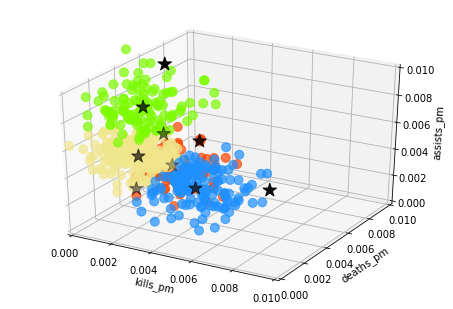

In [27]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#'account_id','hero_id','lose','isRadiant','duration'
# farm:'gold_per_min','xp_per_min','hero_damage','tower_damage'
# skill: 'kills','deaths','assists','last_hits','denies','rune_pickup','courier_kills'
# support: 'stuns','sentry_uses','sentry_kills', 'hero_healing','camp_stacked'

# data.to_csv('players_info_new.csv')
# np.c_(X, labels)

# logistic:kda, last_hits&tower_damage&assist, stun&hero_healing&assist, kills&sentry_kills&courier_kills
# stun&hero_healing&camp_stacked, gpm&rune&last_hits
# linear+: xpm&gpm, gmp&last_hits&kills, 2damage, 2sentry
# linear-: last_hits&assists,

#def model_1(num_center):
data = pd.read_csv('players_info_pm.csv')
##################################################################################
#1
X = np.array(list(zip(data['kills_pm'].values, data['deaths_pm'].values, data['assists_pm'].values)))
#2
#X = np.array(list(zip(data['tower_damage_pm'].values, data['assists_pm'].values,data['last_hits_pm'].values)))
#3
#X = np.array(list(zip(data['assists_pm'].values, data['stuns_pm'].values, data['hero_healing_pm'].values)))
#4
#X = np.array(list(zip(data['kills_pm'].values, data['courier_kills_pm'].values, data['sentry_kills_pm'].values)))
#5
#X = np.array(list(zip(data['stuns_pm'].values, data['hero_healing_pm'].values, data['camp_stacked_pm'].values)))
#6
#X = np.array(list(zip(data['gpm'].values, data['kills_pm'].values, data['last_hits_pm'].values)))
#7
#X = np.array(list(zip(data['gpm'].values, data['xpm'].values)))
#8
#X = np.array(list(zip(data['hero_damage_pm'].values, data['tower_damage_pm'].values)))
#9
#X = np.array(list(zip(data['sentry_uses_pm'].values, data['sentry_kills_pm'].values)))
#10
#X = np.array(list(zip(data['last_hits_pm'].values, data['denies_pm'].values)))
#11
#X = np.array(list(zip(data['kills_pm'].values, data['deaths_pm'].values)))
##################################################################################
# Number of clusters
kmeans = KMeans(n_clusters = 9)
# Fitting the input data
model = kmeans.fit(X)
# Getting the cluster labels
# belong to which cluster
labels = model.predict(X)
# Centroid values
C = model.cluster_centers_
# Sum of square error of each clustering center
error = model.inertia_
# return labels, C, error
print C
print error
print X
print labels
################################################
'''
kmeans_c = KMeans(n_clusters = 9)
model_c = kmeans_c.fit(C)
labels_c = model_c.predict(C)
C_c = model_c.cluster_centers_
print C_c
print C
print labels_c
'''
######################2Dplot####################
'''
X_new = np.c_[X, labels]
X_random = random.sample(X_new, 1000)

colors = ['#FF4500', '#7CFC00', '#1E90FF', '#F0E68C', '#4682B4', '#9932CC', '#FFD700', '#008000', '#00FFFF']
fig, ax = plt.subplots()
for i in range(9):
        points = np.array([X_random[j] for j in range(len(X_random)) if X_random[j][2] == i])
        ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], alpha = 0.7)
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')
ax.set_xlabel('kills_pm')
ax.set_ylabel('deaths_pm')
ax.set_xlim(0, 0.012)
ax.set_ylim(0, 0.009)
plt.show()
'''
################################################
#######################3Dplot###################
#'''
X_new = np.c_[X, labels]
#X_new = np.c_[C, labels_c]
X_random = random.sample(X_new, 1000)
#X_random = X_random
colors = ['#FF4500', '#7CFC00', '#1E90FF', '#F0E68C', '#4682B4', '#9932CC', '#FFD700', '#008000', '#00FFFF']
fig = plt.figure()
ax = Axes3D(fig)
for i in range(4):
        points = np.array([X_random[j] for j in range(len(X_random)) if X_random[j][3] == i])
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=80, c=colors[i], alpha = 0.7)    
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', s=200, c='black')
ax.set_xlabel('kills_pm')
ax.set_ylabel('deaths_pm')
ax.set_zlabel('assists_pm')
ax.set_xlim(0, 0.01)
ax.set_ylim(0, 0.01)
ax.set_zlim(0, 0.01)
#ax.view_init(90, 90)
plt.show()
#'''
##########save##########
#X_new = np.c_[X, labels]
#X_new_df = pd.DataFrame(X_new)
#X_new_df.to_csv('1_players_info_kda.csv', index=False, header=False)
#X_new_df.to_csv('2_players_info_tower_a_last.csv', index=False, header=False)
#X_new_df.to_csv('3_players_info_a_stun_hh.csv', index=False, header=False)
#X_new_df.to_csv('4_players_info_k_ck_sk.csv', index=False, header=False)
#X_new_df.to_csv('5_players_info_stun_hh_camp.csv', index=False, header=False)
#X_new_df.to_csv('6_players_info_gpm_k_last.csv', index=False, header=False)
#X_new_df.to_csv('7_players_info_gpm_xpm.csv', index=False, header=False)
#X_new_df.to_csv('8_players_info_2damage.csv', index=False, header=False)
#X_new_df.to_csv('9_players_info_2sentry.csv', index=False, header=False)
#X_new_df.to_csv('10_players_info_last_deny.csv', index=False, header=False)
#X_new_df.to_csv('11_players_info_a_last.csv', index=False, header=False)

#save labels
#C_df = pd.DataFrame(C)
#C_df.to_csv('1_kda_labels.csv', header=False)
#C_df.to_csv('2_tower_a_last_labels.csv', header=False)
#C_df.to_csv('3_a_stun_hh_labels.csv', header=False)
#C_df.to_csv('4_k_ck_sk_labels.csv', header=False)
#C_df.to_csv('5_stun_hh_camp_labels.csv', header=False)
#C_df.to_csv('6_gpm_k_last_labels.csv', header=False)
#C_df.to_csv('7_gpm_xpm_labels.csv', header=False)
#C_df.to_csv('8_2damage_labels.csv', header=False)
#C_df.to_csv('9_2sentry_labels.csv', header=False)
#C_df.to_csv('10_last_deny_labels.csv', header=False)
#C_df.to_csv('11_a_last_labels.csv', header=False)
########################

################################################



def model_2(num_center):
    data = pd.read_csv('players_info.csv')
##################################################################################
    X = np.array(list(zip(data['duration'].values, data['gpm'].values, data['xpm'].values)))
##################################################################################
# Number of clusters
    kmeans = KMeans(n_clusters = num_center)
# Fitting the input data
    model = kmeans.fit(X)
# Getting the cluster labels
# belong to which cluster
    labels = model.predict(X)
# Centroid values
    C = model.cluster_centers_
# Sum of square error of each clustering center
    error = model.inertia_
    return labels, C, error


In [61]:
#ax.view_init(0, 90)
plt.show()

#X_new = np.c_[X, labels]
#X_new_df = pd.DataFrame(X_new)
#X_new_df.to_csv('players_info_kda.csv', index=False, header=False)
#save labels
#C_new = pd.DataFrame(C)
#C_new.to_csv('kda_labels.csv', header=False)

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#test = pd.read_csv("test.csv")
#print test
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(duration_dist, ax=ax_box)
sns.distplot(duration_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

NameError: name 'duration_dist' is not defined

In [ ]:
#damage_dist = dat_player_dist_1(match_array, 'hero_damage')
#random_matches = get_random_mataches(10000, match_array)
random_matches = read_file('randoms_matches.txt')
test_j = json.loads(random_matches[0])
print test_j['match_id']

In [92]:

sumail_id = 111620041
sumail_avg_damage = player_avg_player(sumail_dat, sumail_id, 'hero_damage')

print sumail_avg_damage

damage_dist = dat_player_dist_1(random_matches, 'hero_damage')
print damage_dist


1651
25668.63
[452, 363, 676, 3321, 0, 182, 371, 446, 1150, 2350, 1882, 1193, 1354, 11573, 218, 2866, 1037, 1717, 3385, 141, 4317, 2866, 2051, 1592, 2980, 1128, 2301, 1266, 713, 1805, 78, 1666, 8447, 20371, 2556, 3529, 5464, 2747, 4229, 13586, 11067, 7619, 17581, 4447, 9298, 3270, 6253, 7640, 3378, 6612, 4040, 0, 12138, 8805, 0, 0, 239, 22895, 62, 5506, 4883, 6973, 8070, 2815, 4038, 19018, 11542, 3397, 4571, 5022, 4587, 8505, 10035, 8546, 6662, 8062, 12960, 25571, 6883, 17560, 9830, 4151, 4501, 12223, 2871, 13113, 17156, 11285, 11371, 12482, 20177, 9983, 12063, 5560, 14985, 9043, 5526, 6932, 12768, 8480, 5222, 3678, 4025, 20916, 4447, 7406, 6442, 1701, 2910, 154, 5953, 11908, 14504, 7238, 4360, 4582, 6279, 1391, 3602, 5859, 10336, 4265, 1737, 5850, 8608, 1452, 5021, 10589, 13276, 9657, 11449, 4699, 10865, 4411, 5412, 22154, 13366, 19172, 1320, 0, 7128, 9493, 6586, 6469, 15784, 24827, 28248, 18662, 9660, 8656, 7351, 7482, 6743, 2732, 2658, 3676, 11073, 4405, 8934, 7850, 5291, 3625, 1027

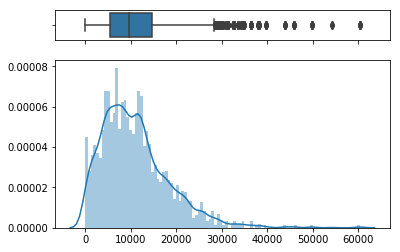

In [93]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(damage_dist, ax=ax_box)
sns.distplot(damage_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

In [97]:
sumail_creeps_stacked = player_avg_player(sumail_dat, sumail_id, 'creeps_stacked')

print sumail_creeps_stacked

creeps_stacked_dist = dat_player_dist_1(random_matches, 'creeps_stacked')
print creeps_stacked_dist

2.35
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

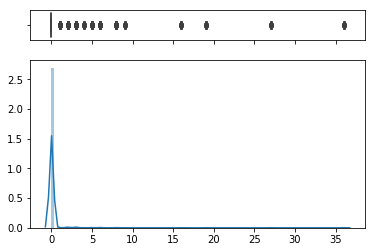

In [98]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(creeps_stacked_dist, ax=ax_box)
sns.distplot(creeps_stacked_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

In [99]:
sumail_denies = player_avg_player(sumail_dat, sumail_id, 'denies')

print sumail_denies

denies_dist = dat_player_dist_1(random_matches, 'denies')
print denies_dist

14.89
[0, 3, 0, 4, 0, 1, 0, 0, 2, 3, 5, 3, 3, 36, 0, 1, 0, 4, 6, 3, 9, 2, 13, 0, 7, 4, 10, 1, 2, 5, 0, 4, 2, 2, 5, 1, 0, 5, 16, 3, 0, 1, 26, 3, 6, 1, 1, 1, 2, 6, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1, 7, 3, 1, 0, 4, 8, 3, 0, 2, 0, 2, 8, 1, 2, 1, 10, 8, 5, 3, 2, 9, 1, 8, 6, 1, 18, 11, 1, 0, 1, 6, 6, 4, 3, 7, 4, 2, 1, 2, 2, 1, 23, 2, 8, 2, 4, 1, 6, 0, 0, 1, 1, 2, 6, 6, 2, 2, 4, 14, 0, 5, 0, 0, 13, 0, 2, 1, 0, 13, 0, 13, 6, 13, 1, 1, 1, 13, 10, 4, 0, 18, 0, 3, 4, 19, 10, 3, 0, 3, 5, 8, 2, 10, 0, 4, 1, 7, 11, 11, 3, 0, 8, 0, 6, 3, 1, 15, 16, 15, 4, 5, 5, 6, 6, 5, 6, 2, 3, 0, 9, 7, 3, 7, 12, 3, 0, 17, 0, 4, 1, 4, 7, 10, 5, 4, 9, 8, 10, 6, 8, 4, 2, 0, 25, 0, 17, 10, 17, 1, 4, 3, 2, 2, 0, 1, 15, 0, 6, 2, 5, 1, 6, 7, 30, 5, 9, 1, 6, 8, 10, 22, 6, 38, 0, 5, 10, 0, 0, 1, 18, 7, 4, 10, 20, 5, 1, 0, 4, 2, 16, 27, 0, 41, 8, 1, 3, 11, 12, 4, 3, 1, 1, 10, 9, 1, 12, 15, 0, 0, 8, 0, 0, 4, 7, 1, 8, 1, 7, 0, 10, 34, 6, 0, 13, 2, 9, 2, 5, 2, 3, 10, 19, 0, 1, 6, 8, 22, 18, 6, 1, 2, 10, 9, 2, 3, 0, 2, 14, 21, 4, 8, 

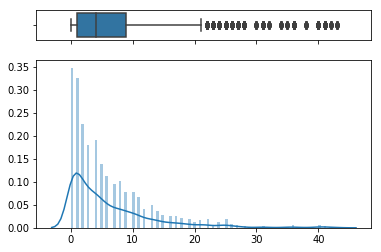

In [100]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(denies_dist, ax=ax_box)
sns.distplot(denies_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()